## Cat/Dog Binary Classification

MNIST was a built in dataset. However for Cat/Dog problem we have to read data that is on disk. So we will need a module called as ImageDataGenerator from keras. There is one function from that ImageDataGenerator object called as flow_from_directory which we will use.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Conv2D,MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator


import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
## Initialising the CNN
classifier = Sequential()

2023-09-04 21:20:30.997584: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
## Architecture

## Convolution
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [4]:
## Flattening
classifier.add(Flatten())

In [5]:
## Fully connected ANN, Hidden ANN and output layer

#hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [6]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

*Create 2 instances for ImageDataGenerator, one for train data and other for test data such that using these instances when u r importing some data the data/images will be rescaled using min-max scaling so as to achieve faster convergence*

In [8]:
# Creating instances
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
pwd

'/Users/sylvia/Desktop/IITR/M10-CV/Live_lectures'

*There are 2 sub-folders in directory and it is binary classification hence we use class_mode=binary*

*<font color=blue>Be it any shape the original images, i want the images to be target_size=(64, 64) because my neural n/w is made to handle input_shape = (64,64,3) during defining its architecture*

*Since by default the color_mode = rgb, so in target_size dimension for channel will be automatically assumed as 3. If we had greyscale images, we need to specify color_mode='grayscale' so that dimension for channel can be assumed as 1.*

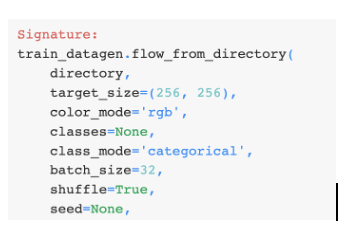

### To load data

**Technique1** - To maintain structure directory when loading images. You have seperate folders for seperate classes withing training and test folders.

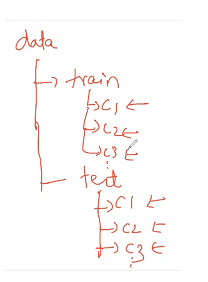

**Technique2** - Apart from above technique another way to load data where u will have all images of all categories in 1 folder & u will save those filenames in an excel and u will label that in an excel or csv file.

As below all images have to be (64, 64). If u want to change here when importing data u will have to fine tune ur model by changing the size which is defined in the architecture.

In [10]:
## Importing training data
train_set = train_datagen.flow_from_directory('data/catdog_ds/training',target_size=(64, 64),class_mode='binary')

Found 98 images belonging to 2 classes.


In [11]:
train_set.image_shape

(64, 64, 3)

In [12]:
train_set.batch_size

32

In [13]:
train_set.color_mode

'rgb'

In [14]:
train_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [15]:
### Dictionary ordering, cats take class 0 and dogs take class 1.

In [16]:
#Two classes are label encoded
train_set.class_indices

{'cats': 0, 'dogs': 1}

#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

In [17]:
## Importng test data
test_set = test_datagen.flow_from_directory('data/catdog_ds/test',target_size=(64, 64),class_mode='binary')

Found 38 images belonging to 2 classes.


In [18]:
## fitting model to images
classifier.fit(train_set,epochs=10,validation_data=test_set)

Epoch 1/10
4/4 [==============================] - 1s 138ms/step - loss: 0.7072 - accuracy: 0.4592 - val_loss: 0.6897 - val_accuracy: 0.5526
Epoch 2/10
4/4 [==============================] - 0s 103ms/step - loss: 0.7406 - accuracy: 0.5102 - val_loss: 0.7187 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 0s 96ms/step - loss: 0.7013 - accuracy: 0.5000 - val_loss: 0.6897 - val_accuracy: 0.5263
Epoch 4/10
4/4 [==============================] - 0s 108ms/step - loss: 0.6851 - accuracy: 0.5102 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 0s 118ms/step - loss: 0.6903 - accuracy: 0.5102 - val_loss: 0.6886 - val_accuracy: 0.5789
Epoch 6/10
4/4 [==============================] - 0s 112ms/step - loss: 0.6769 - accuracy: 0.5510 - val_loss: 0.7066 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 0s 137ms/step - loss: 0.6828 - accuracy: 0.5204 - val_loss: 0.6769 - val_accuracy: 0.6316
Epoch 8/10
4/4 [=====

In [19]:
classifier.evaluate(test_set)

2/2 [==============================] - 0s 8ms/step - loss: 0.6822 - accuracy: 0.5526


[0.682216465473175, 0.5526315569877625]

In [20]:
result = classifier.predict(test_set)
result

2/2 [==============================] - 0s 8ms/step


array([[0.36027467],
       [0.52847046],
       [0.4722217 ],
       [0.36412525],
       [0.27079016],
       [0.4348365 ],
       [0.6298437 ],
       [0.28871742],
       [0.34466672],
       [0.03764915],
       [0.45748162],
       [0.50255257],
       [0.4366351 ],
       [0.40897015],
       [0.46201366],
       [0.3974557 ],
       [0.3053244 ],
       [0.51046556],
       [0.37251893],
       [0.45574018],
       [0.5069681 ],
       [0.46079665],
       [0.3567595 ],
       [0.39477122],
       [0.54977524],
       [0.5240836 ],
       [0.4720357 ],
       [0.46642876],
       [0.46680626],
       [0.4697525 ],
       [0.36266556],
       [0.54598445],
       [0.59281075],
       [0.5193129 ],
       [0.25177628],
       [0.24472639],
       [0.43131185],
       [0.3220042 ]], dtype=float32)

In a binary classification problem with a single output neuron using a sigmoid activation function, the typical convention is that the output value represents the probability of the sample belonging to the "positive" class (often labeled as `1`). The probability of the sample belonging to the "negative" class (`0`) can then be computed as `1 - p`, where `p` is the output probability.

The reason for this convention largely comes down to how the training labels and loss functions are commonly set up. In your training set, you have specified that 'dogs' are associated with `1` and 'cats` are associated with `0` (`train_set.class_indices {'cats': 0, 'dogs': 1}`). During training, the neural network adjusts its weights to output a value close to `1` when it sees a dog and close to `0` when it sees a cat.

In this framework:

- An output close to `1` indicates a strong belief that the sample is a dog (class 1).
- An output close to `0` indicates a strong belief that the sample is a cat (class 0).

So when you call `classifier.predict(test_set)`, the values you are seeing are the model's estimated probabilities that each sample in `test_set` is a dog (class 1). If you want to get the probability that each sample is a cat (class 0), you can simply calculate `1 - result`.

Note: These approaches assume that you are doing binary classification and that the class label for 'dog' is 1 (or probability >= 0.5) and for 'cat' is 0 (or probability < 0.5). Make sure to adjust the code according to how your specific model and data are configured.






**Technique1 to classify as cat or dog**

Defining threshold to convert probability to labels of cat and dog.

In [21]:
## Class label of dog and cat

predictions = []

for res in result:
    if res >= 0.5:
        predictions.append('dog')
    else:
        predictions.append('cat')

print(predictions)

['cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat']


**Technique2 to classify as cat or dog**

In [22]:
predictions = np.where(result >= 0.5, 'dog', 'cat')
predictions

array([['cat'],
       ['dog'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['dog'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['dog'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['dog'],
       ['cat'],
       ['cat'],
       ['dog'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['dog'],
       ['dog'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['dog'],
       ['dog'],
       ['dog'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat']], dtype='<U3')

In [23]:
#save the model
#classifier.save('catdogmodel1311.h5')

In [24]:
## Prediction of single new data

test_image= image.load_img('data/catdog_ds/inference/dog1.jpg' ,target_size =(64,64))

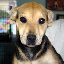

In [25]:
test_image

In [26]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [27]:
test_image.shape

(64, 64, 3)

In [28]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [29]:
result1 = classifier.predict(test_image)

1/1 [==============================] - 0s 46ms/step


In [30]:
result1

array([[2.189389e-23]], dtype=float32)

In [31]:
# result=np.around(result)

In [32]:
## Class label of dog and cat

if result1 >= 0.5:
        print('dog')
else:
        print('cat')
    

cat
